In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

In [5]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


The columns other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh has no data in it. So we can drop these columns

In [6]:
df = df.drop(columns=['other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh'])

In [7]:
df.shape

(907, 22)

In [8]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               906
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

other_fuel2 can also be dropped as it has only one data in it

In [9]:
df = df.drop(columns=['other_fuel2'])

Also the columns other_fuel1, owner, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_data_source has less than 50% values present in those columns

Let us make a new column total_generation out of all the other generation data columns

In [10]:
df['total_generation'] = df['generation_gwh_2014'] + df['generation_gwh_2015']  + df['generation_gwh_2016'] + df['generation_gwh_2017']+df['generation_gwh_2018']  

In [11]:
df = df.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],axis = 1)

In [12]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,3637.554320
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,27859.499736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN


In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_data_source    458
total_generation          516
dtype: int64

# EDA

<AxesSubplot:xlabel='primary_fuel', ylabel='total_generation'>

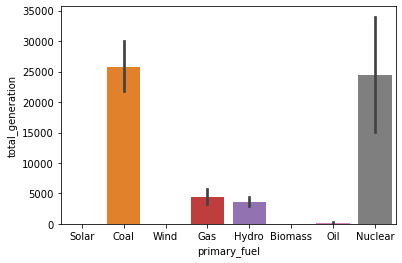

In [15]:
sns.barplot(x="primary_fuel", y="total_generation", data=df)

<AxesSubplot:xlabel='generation_data_source', ylabel='total_generation'>

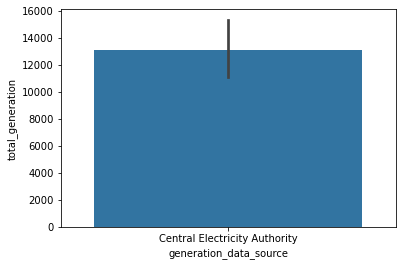

In [16]:
sns.barplot(x="generation_data_source", y="total_generation", data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='total_generation'>

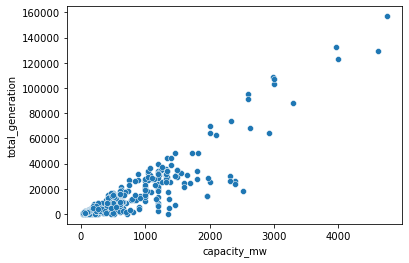

In [17]:
sns.scatterplot(x="capacity_mw", y="total_generation", data=df)

Seems like there is some linear relation between these two columns

<AxesSubplot:xlabel='commissioning_year', ylabel='total_generation'>

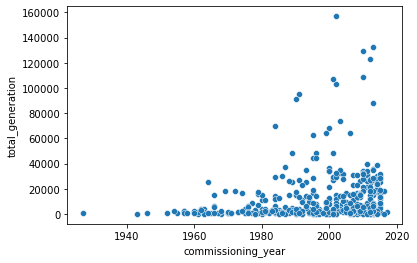

In [18]:
sns.scatterplot(x="commissioning_year", y="total_generation", data=df)

Total generation is larger in current years

<AxesSubplot:xlabel='source', ylabel='capacity_mw'>

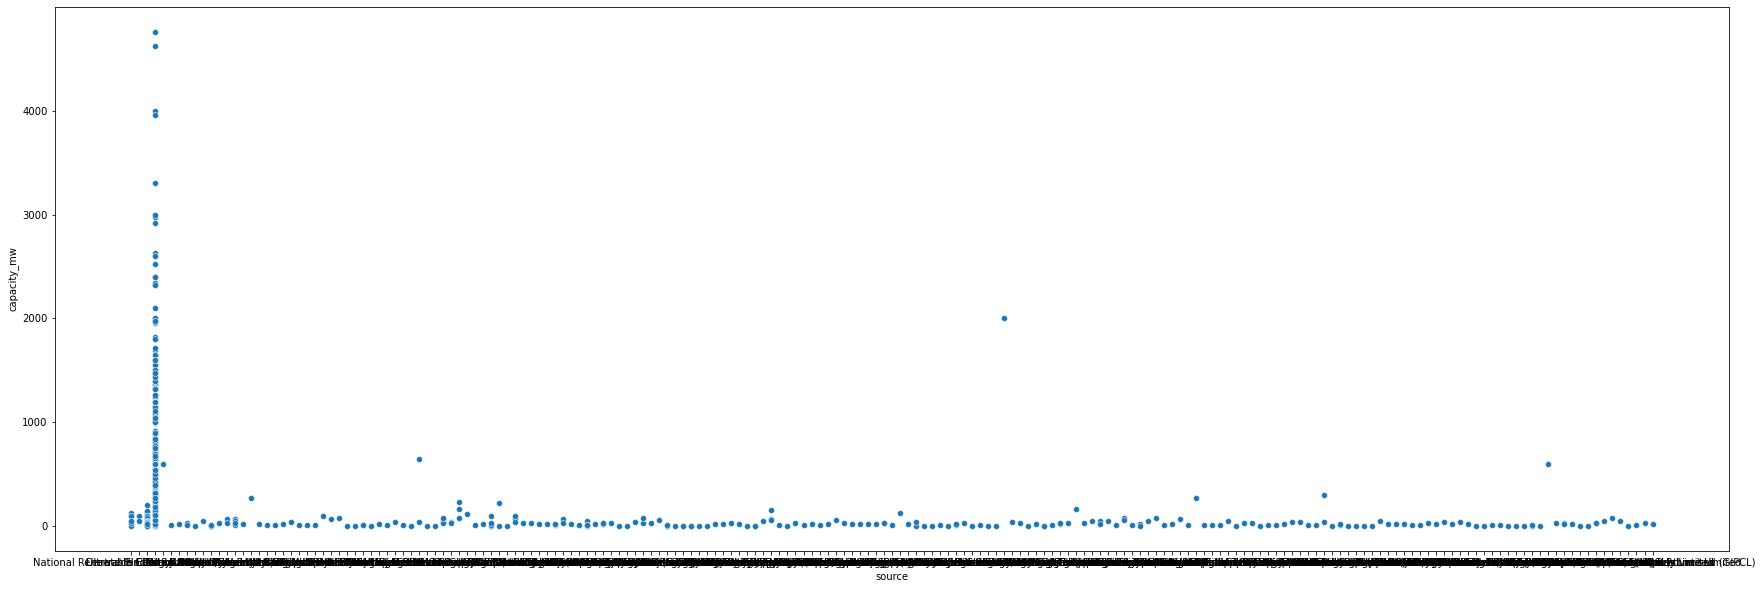

In [19]:
plt.figure(figsize=(30,10))

(sns.scatterplot(x="source", y="capacity_mw", data=df))

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

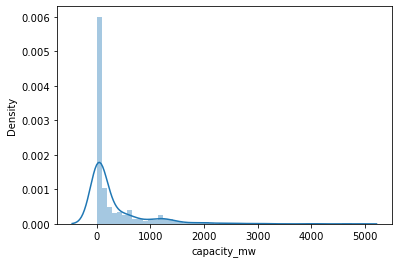

In [20]:
sns.distplot(df['capacity_mw'])

Capacity seems to be highly right skewed

In [21]:
df['country'].nunique()

1

In [22]:
df['country_long'].nunique()

1

Both of these columns are insignificant. Let us drop these

In [23]:
df= df.drop(columns=['country','country_long'])

In [24]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source,total_generation
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,3637.554320
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,27859.499736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority,NaN
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN


Rest of the missing values in all the columns I fill up with some impossible values, such as for other_fuel column we can just fill up the missing values creating an extra category 'Unknown'

In [25]:
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_data_source    458
total_generation          516
dtype: int64

In [26]:
df["latitude"].value_counts()

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64

<AxesSubplot:xlabel='latitude', ylabel='Density'>

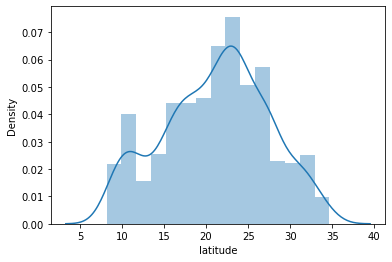

In [27]:
sns.distplot(df['latitude'])

latitude has near normal distribution, So I shall replace the missing values by mean of the column

In [28]:
df['latitude'].mean()

21.19791811846691

In [29]:
df['latitude'].fillna(df['latitude'].mean(), inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='Density'>

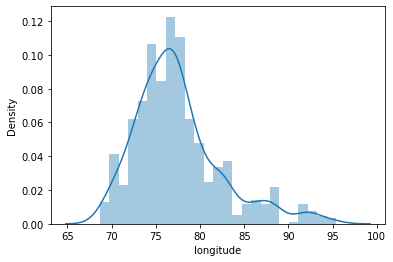

In [30]:
sns.distplot(df['longitude'])

longitude also has near normal distribution, So I shall replace the missing values by mean of the column

In [31]:
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

In [32]:
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_data_source    458
total_generation          516
dtype: int64

<AxesSubplot:xlabel='commissioning_year'>

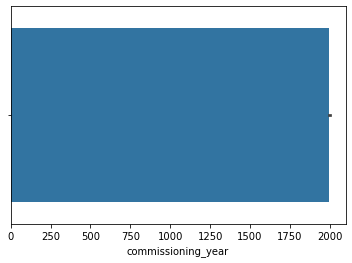

In [34]:
sns.barplot(df['commissioning_year'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

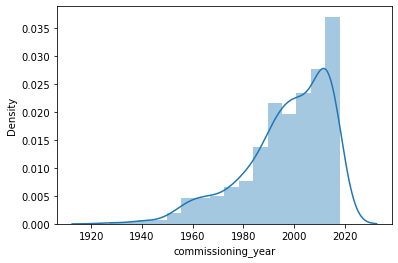

In [35]:
sns.distplot(df['commissioning_year'])

I shall fill up the  missing values in 'commissioning_year' column by an absurd value 2050

In [36]:
df['commissioning_year'].fillna(value= 2050, inplace=True)

In [37]:
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_data_source    458
total_generation          516
dtype: int64

Let us fill up the other_fuel1 column by 'NA'

In [38]:
df['other_fuel1'].fillna(value= 'NA', inplace=True)

In [39]:
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_data_source    458
total_generation          516
dtype: int64

In [40]:
df['owner'].fillna(value= 'NA', inplace=True)

In [41]:
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_data_source    458
total_generation          516
dtype: int64

In [42]:
df['owner'].fillna(value= 'Unknown', inplace=True)

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

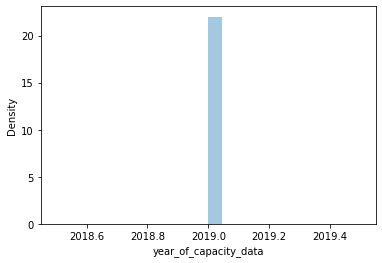

In [43]:
sns.distplot(df['year_of_capacity_data'])

In [44]:
(df['year_of_capacity_data']).nunique()

1

In [45]:
# Let us remove this column also as it contains a single value

df = df.drop(columns=['year_of_capacity_data'])

In [46]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_data_source,total_generation
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NA,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NA,2050.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NA,2050.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NA,2004.0,NA,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority,3637.554320
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NA,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority,27859.499736


In [49]:
# Missing values of generation_data_source are filled with unknown 
df['generation_data_source'].fillna(value='unknown', inplace=True)

<AxesSubplot:xlabel='total_generation', ylabel='Density'>

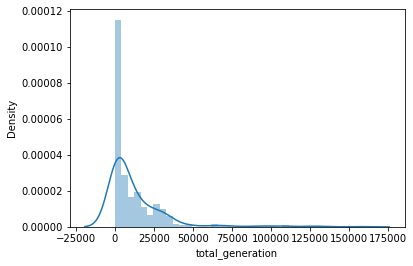

In [50]:
sns.distplot(df['total_generation'])

In [51]:
# let us fill the missing values with -1 here

df['generation_data_source'].fillna(value='unknown', inplace=True)

In [52]:
df.isnull().sum()

name                       0
gppd_idnr                  0
capacity_mw                0
latitude                   0
longitude                  0
primary_fuel               0
other_fuel1                0
commissioning_year         0
owner                      0
source                     0
url                        0
geolocation_source        19
generation_data_source     0
total_generation           0
dtype: int64

In [53]:
df['geolocation_source'].fillna(value='not_known', inplace=True)

In [54]:
df.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_data_source    0
total_generation          0
dtype: int64

Now the dataset finally has no missing values

First I shall transform the categorical features using label encoder

In [55]:
#We will use LabelEncoder to change the data type
Object=['name','gppd_idnr','primary_fuel','other_fuel1','owner','source','url','geolocation_source','generation_data_source']

#We will use LabelEncoder to change the data type

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in Object:
    df[i]=le.fit_transform(df[i])

In [56]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_data_source,total_generation
0,0,657,2.5,28.1839,73.2407,6,2,2011.0,230,109,128,1,1,-1.000000
1,1,519,98.0,24.7663,74.6090,1,2,2050.0,259,174,173,2,1,-1.000000
2,2,853,39.2,21.9038,69.3732,7,2,2050.0,2,21,205,2,1,-1.000000
3,3,0,135.0,23.8712,91.3602,2,2,2004.0,154,22,58,2,0,3637.554320
4,4,1,1800.0,21.9603,82.4091,1,3,2015.0,154,22,58,2,0,27859.499736


Let us now  check the skewness

In [57]:
df.skew()

name                      0.000000
gppd_idnr                 0.000000
capacity_mw               3.123576
latitude                 -0.149698
longitude                 1.141881
primary_fuel              0.472251
other_fuel1               1.109169
commissioning_year       -0.342611
owner                    -0.533174
source                    1.827373
url                       1.510537
geolocation_source       -1.920302
generation_data_source   -0.019880
total_generation          5.100909
dtype: float64

Let us use log1p trsansformation to treat the skewness as some of the features has 0 or -ve values

In [58]:
from sklearn.preprocessing import power_transform
col_skewed= ['capacity_mw','longitude','other_fuel1','source','url','geolocation_source','total_generation']

for i in col_skewed:
    df[i]=power_transform(df[i].to_numpy().reshape(-1, 1))

In [59]:
df.skew()

name                      0.000000
gppd_idnr                 0.000000
capacity_mw               0.022164
latitude                 -0.149698
longitude                 0.002926
primary_fuel              0.472251
other_fuel1              -0.055720
commissioning_year       -0.342611
owner                    -0.533174
source                   -0.214066
url                       0.064576
geolocation_source       -0.004464
generation_data_source   -0.019880
total_generation          0.391288
dtype: float64

skewness is now removed, let us check if outliers are present in the dataset

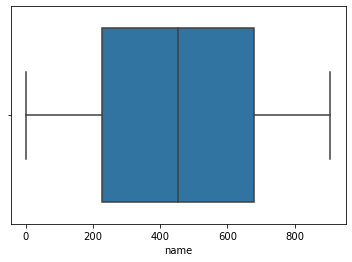

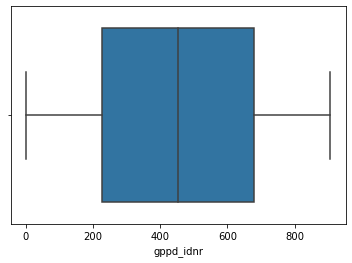

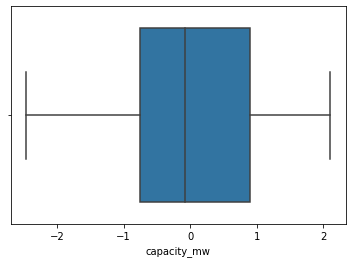

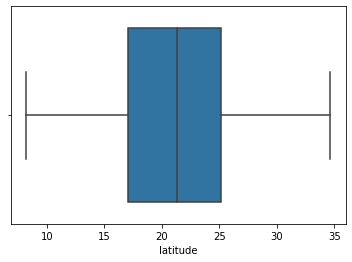

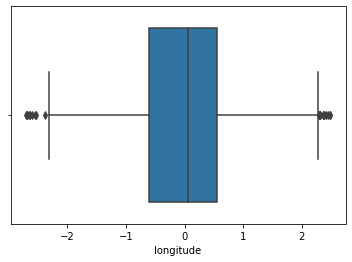

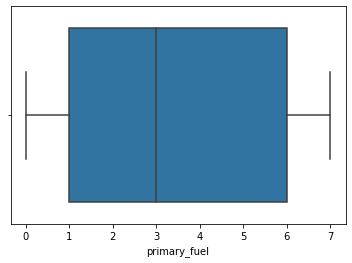

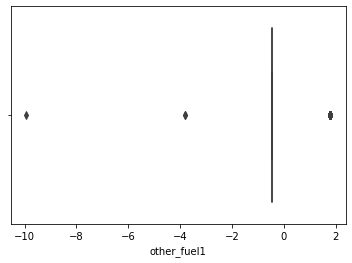

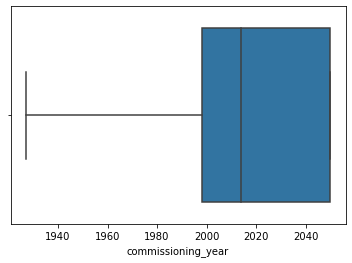

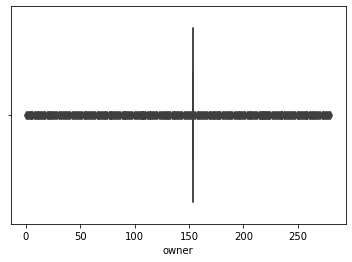

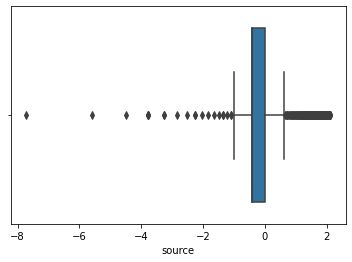

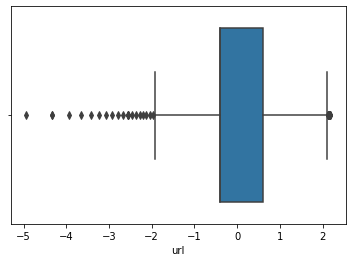

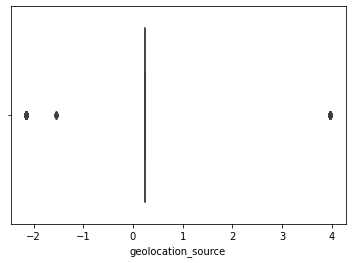

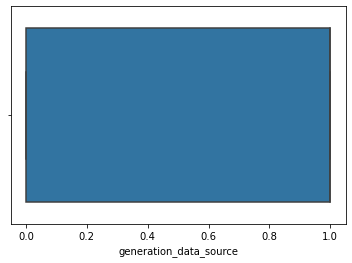

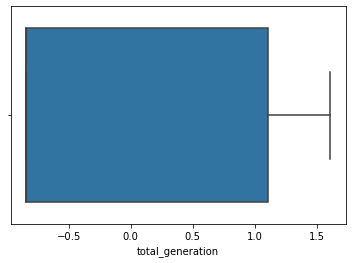

In [61]:
columns=df.columns

for i in columns:
    sns.boxplot(df[i])
    plt.show()

longitude, owner,url, source has outliers

I shall now remove those by using standard deviation method

In [62]:
from numpy import mean
from numpy import std


columns=['longitude','source','url','other_fuel1','owner', 'geolocation_source']

for i in columns:
    if isinstance(df[i][0], str) :
        continue
    else:
        #Calculating Mean and Std 
        mean, std = (df[i].mean(),df[i].std())
        # identify outliers
        cut_off = std*3
        lower, upper = mean - cut_off, mean + cut_off
        outliers = [x for x in df[i] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))
        df[i] = df[i].apply(lambda x: lower if x < lower else (upper if x > upper else x))



Identified outliers: 0
Identified outliers: 9
Identified outliers: 8
Identified outliers: 3
Identified outliers: 0
Identified outliers: 19


I shall now check for correlation

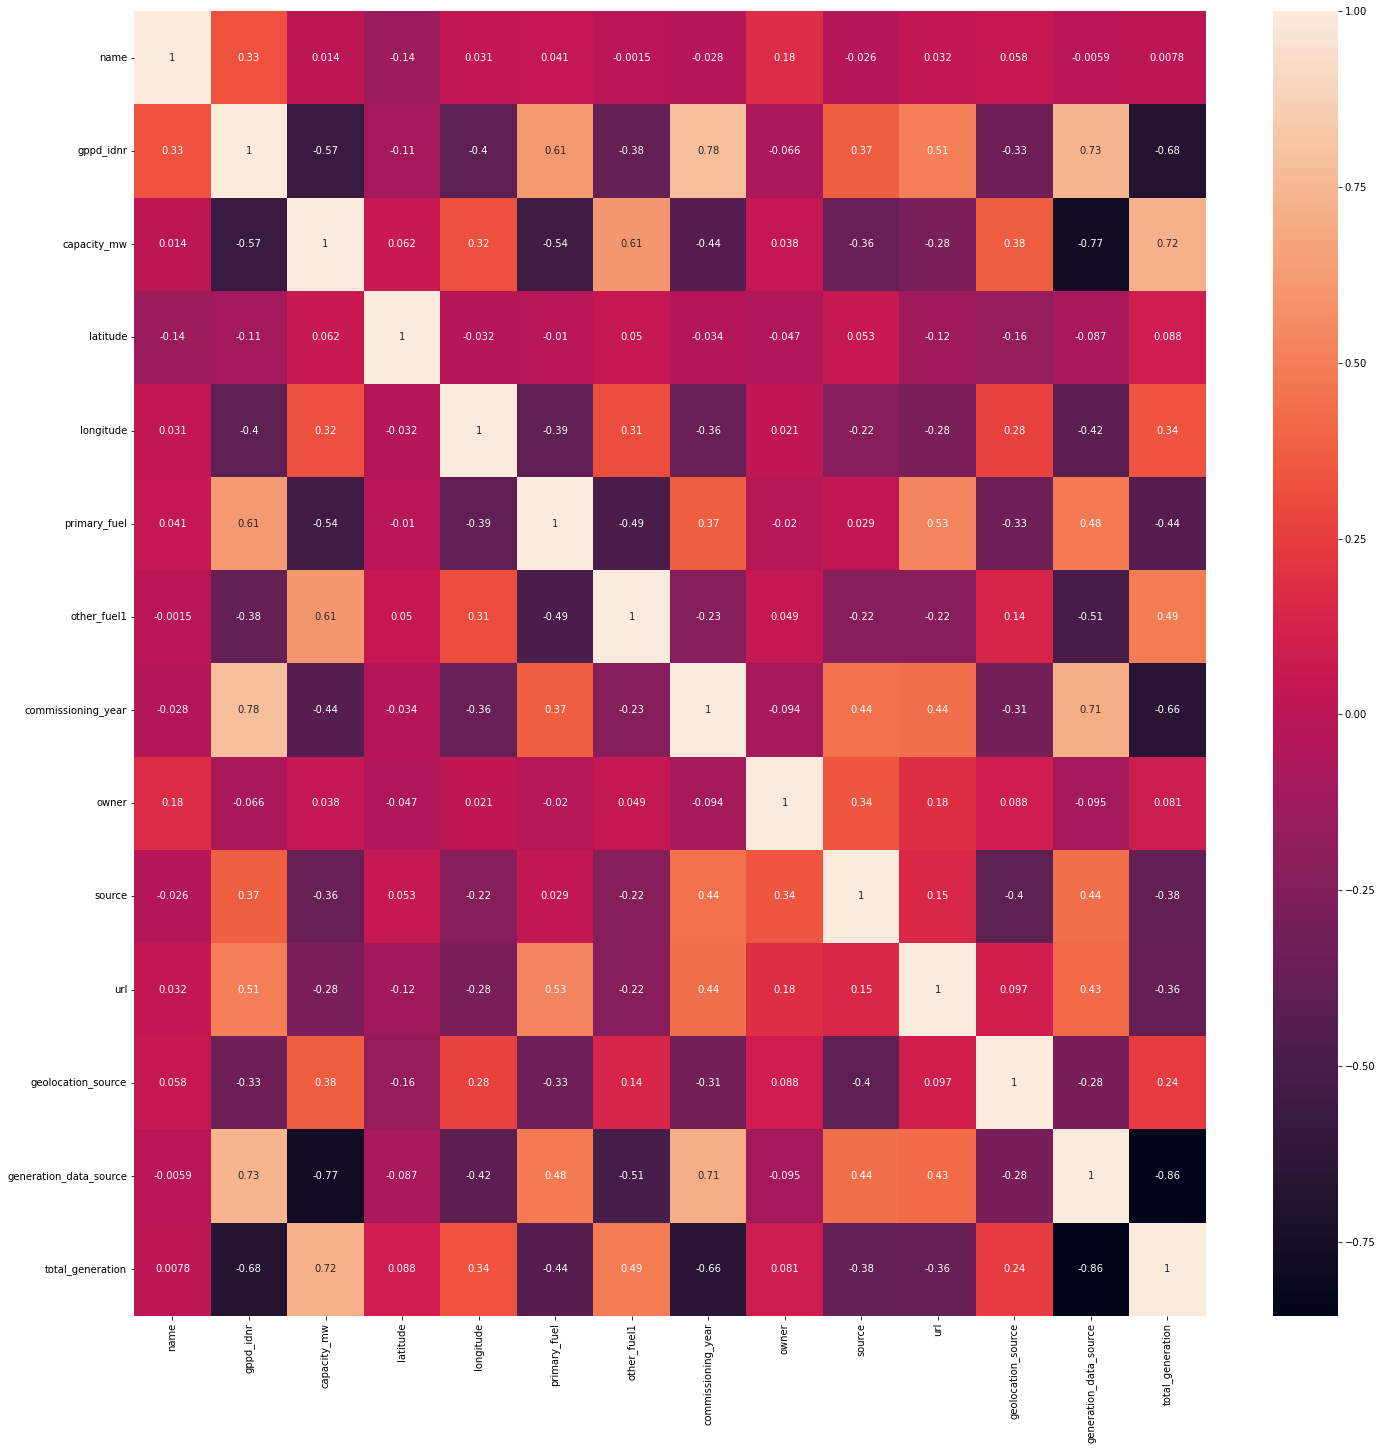

In [63]:
# Let us now see the correlation by plotting heatmap

corr_hmap=df.corr()

plt.figure(figsize=(24,24))
sns.heatmap(corr_hmap,annot=True)
plt.show()

There are correlation present for a few features

In [64]:
# Let us find out which feature has high correlation(>0.7)

for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

commissioning_year
generation_data_source
generation_data_source
generation_data_source
total_generation
total_generation


# Making predictions for capacity_mw using regression

 Let us now standardize the data using standardscalar transformation & then Check Multi colinearity using VIF

In [65]:
from sklearn.preprocessing import StandardScaler
x = df.drop(columns=["capacity_mw"])
y=df["capacity_mw"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [66]:
x_scaled.shape

(907, 13)

In [68]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df.drop(columns=["capacity_mw"])
y=df["capacity_mw"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,2.050437,name
1,7.865477,gppd_idnr
2,1.085023,latitude
3,1.348836,longitude
4,3.464583,primary_fuel
5,1.811611,other_fuel1
6,4.122175,commissioning_year
7,1.681046,owner
8,2.559277,source
9,2.173192,url


I shall first drop the gppd_idnr and check again

In [70]:
x = df.drop(columns=["capacity_mw","gppd_idnr"])
y=df["capacity_mw"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.066616,name
1,1.077300,latitude
2,1.345589,longitude
3,2.754364,primary_fuel
4,1.804631,other_fuel1
5,2.639192,commissioning_year
6,1.566983,owner
7,2.439754,source
8,2.141265,url
9,1.939799,geolocation_source


In [71]:
x = df.drop(columns=["capacity_mw","gppd_idnr","generation_data_source"])
y=df["capacity_mw"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.065233,name
1,1.073069,latitude
2,1.322246,longitude
3,2.735630,primary_fuel
4,1.754618,other_fuel1
5,2.476509,commissioning_year
6,1.525350,owner
7,2.339570,source
8,2.121257,url
9,1.939156,geolocation_source


Now the data seems to be clean

# Model_fitting

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor


First I shall check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [73]:
minMSE=1
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.30,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    mse=mean_squared_error(y_test,pred)
    if mse<minMSE:
        minMSE=mse
        maxRS=i
print('Best MSE',minMSE,' on Random state',maxRS)

Best MSE 0.2509752821559336  on Random state 31


let us now split the data with the best random state is 31

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.30,random_state=31)

Let us now train and test the data using different model

In [76]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsRegressor(n_neighbors=5)
rfc=RandomForestRegressor(n_estimators=100)
dt=DecisionTreeRegressor()
gnb=GaussianNB()
ad=AdaBoostRegressor(n_estimators=100)
et=ExtraTreeRegressor()

In [77]:
import math
from math import sqrt

model=(knn,rfc,dt,ad,et)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('r2 score of',m)
    print(r2_score(y_test,pred))
    print('MAE:',mean_absolute_error(y_test,pred))
    print('MSE:',mean_squared_error(y_test,pred))
    print('RMSE:',sqrt(mean_squared_error(y_test,pred)))
    print('-------------------------------------------------------------------------------------------')

r2 score of KNeighborsRegressor()
0.618786825043956
MAE: 0.45039575170691143
MSE: 0.3489279962192279
RMSE: 0.5907012749429511
-------------------------------------------------------------------------------------------
r2 score of RandomForestRegressor()
0.80843814308233
MAE: 0.3032764593716328
MSE: 0.1753383651916653
RMSE: 0.41873424172339346
-------------------------------------------------------------------------------------------
r2 score of DecisionTreeRegressor()
0.7258300116452825
MAE: 0.3478487329847121
MSE: 0.2509503630641606
RMSE: 0.5009494615868557
-------------------------------------------------------------------------------------------
r2 score of AdaBoostRegressor(n_estimators=100)
0.7147360548291206
MAE: 0.4048896718978402
MSE: 0.26110476584012016
RMSE: 0.5109841150565447
-------------------------------------------------------------------------------------------
r2 score of ExtraTreeRegressor()
0.5399205773192701
MAE: 0.44231445434923783
MSE: 0.42111501281716407
RMSE: 0.

RandomForestRegressor is giving the best R2 score and errors

# Cross Validation
let us check the underfitting and overfitting of the best model using cross validation technique

In [78]:
from sklearn.model_selection import cross_val_score

for m in model:
    score=cross_val_score(m,x_scaled,y,cv=10, scoring='neg_root_mean_squared_error')
    print('RMSE of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

RMSE of KNeighborsRegressor()
-0.5900159660794173
-------------------------------------------------------------------------------
RMSE of RandomForestRegressor()
-0.4689445710182067
-------------------------------------------------------------------------------
RMSE of DecisionTreeRegressor()
-0.611633064660569
-------------------------------------------------------------------------------
RMSE of AdaBoostRegressor(n_estimators=100)
-0.5130133421390822
-------------------------------------------------------------------------------
RMSE of ExtraTreeRegressor()
-0.6171379368194938
-------------------------------------------------------------------------------


RandomForestRegressor is again giving the best error & the least difference between test RMSE & cv RMSE

# Hyperparameter Tuning
Let's tune the parameters using GridSearchCV

In [79]:
params = {"n_estimators":[20, 100,120, 140],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rfc,param_grid = params,cv=5,n_jobs=-1) # Use all the cores in your system to improve performance

grid_search.fit(x_train,y_train)
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 100}


In [80]:
Finalmod=RandomForestRegressor(max_depth= 10, min_samples_leaf=5, min_samples_split= 11, n_estimators=100)
Finalmod.fit(x_train,y_train)
y_pred=Finalmod.predict(x_test)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=(mean_squared_error(y_test,y_pred,squared=False))
mae=mean_absolute_error(y_test,y_pred)
print("Performance of the model after tuning: MSE, MAE,RMSE,R2 ----",mse,rmse,mae, r2)


Performance of the model after tuning: MSE, MAE,RMSE,R2 ---- 0.18791632626471114 0.433493167494842 0.31740422428781234 0.794696383959864


Model r2 score does not improve, so let us use RandomizedSearchCv



In [81]:
from sklearn.model_selection import RandomizedSearchCV
params = {"n_estimators":[20, 100,120, 140],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

rnd_srch = RandomizedSearchCV(RandomForestRegressor(),cv=5,param_distributions=params)
rnd_srch.fit(x_train,y_train)

rnd_srch.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=11)

In [82]:
Finalmod=RandomForestRegressor(max_depth= 10, min_samples_leaf=5, min_samples_split= 11, n_estimators=100)
Finalmod.fit(x_train,y_train)
y_pred=Finalmod.predict(x_test)
r2=r2_score(y_test,y_pred)
gb_mse=mean_squared_error(y_test,y_pred)
gb_rmse=(mean_squared_error(y_test,y_pred,squared=False))
gb_mae=mean_absolute_error(y_test,y_pred)
print("Performance of the model after tuning: MSE, MAE,RMSE,R2 ----",gb_mse,gb_rmse,gb_mae, r2)


Performance of the model after tuning: MSE, MAE,RMSE,R2 ---- 0.1872046651149034 0.43267154414740916 0.31468571916600835 0.7954738928136982


In [83]:
import joblib
joblib.dump(Finalmod,'Global power plant_Regression')

['Global power plant_Regression']

# Predicting Primary Fuel using classification model

In [84]:
x = df.drop(columns=["primary_fuel"])
y=df["primary_fuel"]

scaler=StandardScaler()
x_c= scaler.fit_transform(x)

In [85]:
vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_c,i) for i in range (x_c.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.899146,name
1,6.309691,gppd_idnr
2,3.595630,capacity_mw
3,1.078176,latitude
4,1.356180,longitude
5,1.736254,other_fuel1
6,4.120517,commissioning_year
7,1.599886,owner
8,1.963147,source
9,1.838102,url


In [86]:
x = df.drop(columns=["primary_fuel","gppd_idnr"])
y=df["primary_fuel"]

scaler=StandardScaler()
x_c= scaler.fit_transform(x)

In [87]:
vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_c,i) for i in range (x_c.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.065615,name
1,3.563383,capacity_mw
2,1.075523,latitude
3,1.342914,longitude
4,1.719494,other_fuel1
5,2.775809,commissioning_year
6,1.546880,owner
7,1.963145,source
8,1.595109,url
9,1.626824,geolocation_source


In [88]:
x = df.drop(columns=["primary_fuel","gppd_idnr","generation_data_source"])
y=df["primary_fuel"]

scaler=StandardScaler()
x_c= scaler.fit_transform(x)

In [89]:
vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_c,i) for i in range (x_c.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.062906,name
1,2.904420,capacity_mw
2,1.073833,latitude
3,1.305583,longitude
4,1.717461,other_fuel1
5,2.491922,commissioning_year
6,1.498041,owner
7,1.888773,source
8,1.567267,url
9,1.602640,geolocation_source


# Model_Fitting

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [91]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_c,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.9084249084249084  on Random state 152


In [92]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier()
gnb=GaussianNB()
ad=AdaBoostClassifier(n_estimators=100)

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x_c,y,test_size=.20,random_state=152)

In [94]:
model=(lg,sv,knn,rfc,dt,gnb,ad)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8791208791208791
[[ 8  1  0  0  0  0  0  0]
 [ 1 50  0  0  0  0  0  0]
 [ 0  5  2  3  0  0  0  1]
 [ 0  0  3 49  0  0  0  0]
 [ 0  0  1  2  0  0  0  0]
 [ 1  1  0  3  0  0  0  0]
 [ 0  0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.88      0.98      0.93        51
           2       0.33      0.18      0.24        11
           3       0.86      0.94      0.90        52
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        22
           7       0.97      1.00      0.98        29

    accuracy                           0.88       182
   macro avg       0.60      0.62      0.61       182
weighted avg       0.83      0.88      0.85       182

--------------------------------------------------------------------------

RFC is giving us the best test accuracy

# Cross Validation
let us check the underfitting and overfitting of the best model using cross validation technique





In [95]:
for m in model:
    score=cross_val_score(m,x_c,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')


Mean Accuracy of LogisticRegression()
0.8589035274118147
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8577985550361241
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.8589278125189728
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.9040920405561289
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.8501548175581325
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.8137089429907111
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.638431182077591
-------------------------------------------------------------------------------


RFC is also giving us the least difference between test accuracy & CV score

We can not check ROC_AUC score to pick the final model in this case as the target variable is not binary but is a multiclass variable

So I am choosing RFC as the best model here

# Hypertuning with RandomizedSearchCV¶

In [98]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':list(range(1, 200, 2)), 'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6],
         'criterion':['gini','entropy']}
rnd_srch = RandomizedSearchCV(RandomForestClassifier(),cv=5,param_distributions=params)
rnd_srch.fit(x_train,y_train)

rnd_srch.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=121)

In [100]:
#Predicting with the best fitted model

Finalmod=RandomForestClassifier( max_depth=15, min_samples_leaf=5,min_samples_split=10, n_estimators=121)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)


89.56043956043956


In [101]:
# Let us save the finl classification model

import joblib
joblib.dump(Finalmod,'Global_plant_classification')

['Global_plant_classification']